In [5]:
#THIS IS NOT A CLASSIFICATION PROBLEM. THIS IS A REGRESSION PROBLEM !

In [6]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [7]:
completeHouseData= pd.read_csv("C:/Users/rvaish/Documents/Python Scripts/house_data.csv")

In [8]:
#The total records in the file are...

In [9]:
len(completeHouseData)

21613

In [10]:
#Splitting the data into Train and Test Dataframes

In [11]:
trainData = completeHouseData.head(21600)

In [12]:
testData = completeHouseData.tail(13)

In [13]:
del testData['price']

In [14]:
trainData.shape

(21600, 21)

In [15]:
testData.shape

(13, 20)

In [16]:
#This displays the entire data on the Jupyter Notebook. However, the cost is the degraded performance.


#from IPython.core.display import HTML
#display(HTML(trainData.to_html()))


#from IPython.core.display import HTML
#display(HTML(testData.to_html()))


In [17]:
#Checking For Nulls

In [18]:
trainData.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
#Checking For Nulls

In [20]:
testData.isnull().sum() 

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
#Therefore we don't need to make any threshold cut-offs !

In [22]:
#Finding Numerical Columns
numeric_features = trainData.select_dtypes(include=[np.number])
#numeric_features.dtypes

In [23]:
#Time to compute correlation

In [24]:
#Finding the first five features are the most positively correlated with price
corr = numeric_features.corr()
print (corr['price'].sort_values(ascending=False)[:5], '\n')

price            1.000000
sqft_living      0.701915
grade            0.667330
sqft_above       0.605402
sqft_living15    0.585355
Name: price, dtype: float64 



In [25]:
#Wow Feeling !!!

In [26]:
#Lets see something graphical

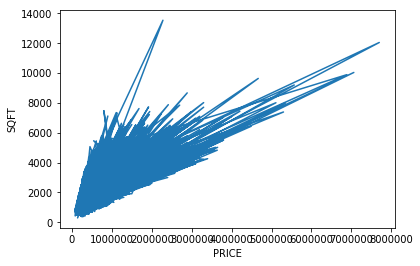

In [27]:
x =  trainData['price'] 
y =  trainData['sqft_living']

plt.xlabel("PRICE") 
plt.ylabel("SQFT") 
plt.plot(x,y) 
plt.show()

In [28]:
#Now we will pick the +ve Correlated columns for our analysis purpose.

In [29]:
selectdColumns=['sqft_living','grade','sqft_above']

In [50]:
#trainData[['sqft_living','grade','sqft_above','price']].to_csv("C:/Users/rvaish/Documents/Python Scripts/trainHPData.csv")

In [49]:
reg=LinearRegression()

In [31]:
reg.fit(trainData[selectdColumns], trainData["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#IMPORTANT: NOW WE ARE SPLITTING OUR TRAIN DATAFRAME IN 80% 20% RATIO.

In [33]:
all_X = trainData[selectdColumns]
all_y = trainData['price']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

reg.fit(train_X, train_y)
predictions = reg.predict(test_X)
print(predictions)

[540711.99585436 552950.73706855 657794.5054675  ... 513340.37152099
 793849.40382292 556970.04706172]


In [34]:
len(predictions)

4320

In [35]:
#Wondering what is this 4320 ?
#Answer: 4320 is 20% of 21600 (From the size of Training Set)

In [36]:
#Now working on our test data

In [37]:
testData[selectdColumns]

,sqft_living,grade,sqft_above
21600,4470,11,4470
21601,1425,8,1425
21602,1500,6,1500
21603,2270,8,2270
21604,1490,8,1490
21605,2520,9,2520
21606,3510,9,2600
21607,1310,8,1180
21608,1530,8,1530
21609,2310,8,2310


In [38]:
predictions = reg.predict(testData[selectdColumns])
print(predictions)

[1257109.81403405  456210.03659663  242968.46501375  584943.72462619
  466112.62798352  735364.43385964  957337.55976796  448854.21603526
  472206.53037545  591037.62701812  282175.45559445  482870.85956133
  282175.45559445]


In [39]:
len(predictions)

13

In [40]:
#This 13 is the size of our testing dataset

In [41]:
#Below are the cheat values - Copied last 6 values from the original file.

In [42]:
cheatValues =[
'475000',
'360000',
'400000',
'402101',
'400000',
'325000']

In [43]:
predictedValues =[
'448854.21603526',
'472206.53037545',
'591037.62701812',
'282175.45559445',
'482870.85956133',
'282175.45559445'
]

In [44]:
difference = [6]
for i in range(6):
   print(float(cheatValues[i])-  float(predictedValues[i]))


26145.783964739996
-112206.53037544998
-191037.62701812002
119925.54440555
-82870.85956133
42824.54440555
